# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Code to Read and Process Data

This Python code snippet performs the following tasks:

1. **Reads a CSV File**: It imports data from a CSV file (`BTC_USDT.csv`) using `pandas.read_csv()`, while specifying custom column names: `Timestamp`, `Open`, `High`, `Low`, `Close`, and `Volume`.

2. **Converts Timestamp**: The 'Timestamp' column is converted from milliseconds to a readable `datetime` format using `pd.to_datetime()`.



In [2]:
# To read data and specify column names
data = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='ms')

In [3]:
data=data.set_index('Timestamp')

In [4]:
data.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


## Exploratory Data Analysis (EDA)

### Code to Explore and Clean Data

This Python code snippet performs several data exploration and cleaning tasks:

1. **Descriptive Statistics**: `data.describe()` provides a statistical summary of the dataset, including count, mean, standard deviation, min, max, and quartiles.

2. **Data Info**: `data.info()` displays a concise summary of the dataset, including column names, non-null counts, and data types.

3. **Check for Null Values**: `data.isnull().sum()` checks and prints the total number of missing (null) values in each column.

4. **Check for Duplicates**: `data.duplicated().sum()` identifies and prints the number of duplicate rows in the dataset.


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000
mean,28370.952993,29050.382621,27647.521783,28403.517949,67283.598524
std,23943.083038,24452.431656,23422.337910,23971.252762,79721.726879
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,8645.372500,8847.465000,8306.042500,8636.762500,27691.930523
50%,20700.490000,21280.025000,20217.005000,20700.495000,43191.295397
75%,42872.462500,43800.580000,42000.475000,42953.700000,70390.404101
max,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2720 entries, 2017-08-17 to 2025-02-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2720 non-null   float64
 1   High    2720 non-null   float64
 2   Low     2720 non-null   float64
 3   Close   2720 non-null   float64
 4   Volume  2720 non-null   float64
dtypes: float64(5)
memory usage: 127.5 KB


In [7]:
# check null values
print(data.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [8]:
## Check Duplicate Values
print(data.duplicated().sum())

0


# Data Visualization

### Analyzing Crypto Data with Visualizations

This code snippet creates various plots to analyze the cryptocurrency data:

1. **Close Price Over Time**:
   - The first plot visualizes the **Close price** over time using `data['Close'].plot()`, with a title "Crypto Close Price over Time" and labels for the x-axis ("Date") and y-axis ("Close Price").

2. **Distribution of Close Price**:
   - The second plot visualizes the **distribution** of the `Close` price using `data[['Close']].hist()`, with 50 bins. This helps in understanding the spread and frequency of the Close price values.

3. **Volume Plot**:
   - The third plot shows the **Volume** over time using `plt.plot(data['Volume'])`. This plot displays the trading volume at different points in the dataset, helping to identify trends or spikes in volume.

Each plot provides insights into different aspects of the data, essential for forecasting crypto prices.


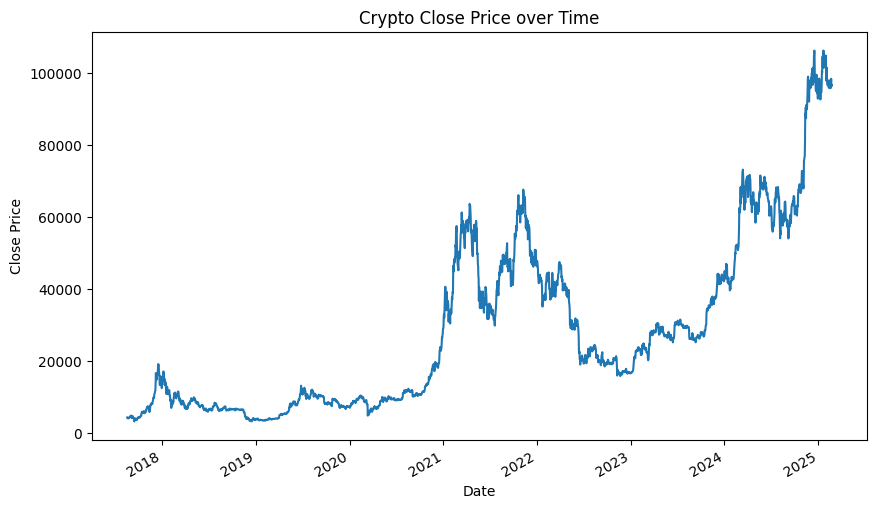

In [9]:
### Since we're likely forecasting crypto price we should focus on the Close price for analysis
data['Close'].plot(figsize=(10, 6))
plt.title("Crypto Close Price over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

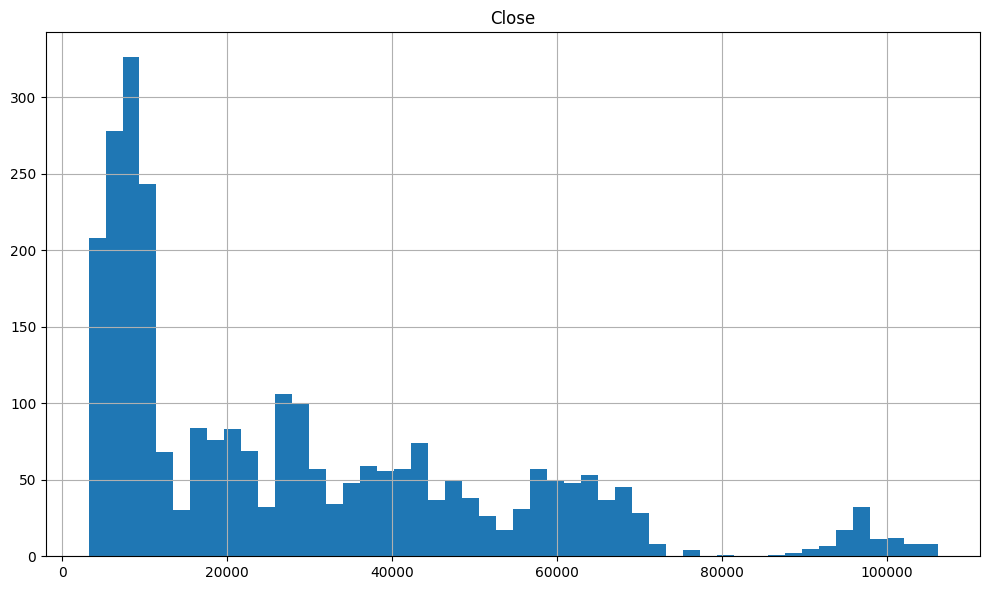

In [10]:
# Plot the distribution of numerical features
data[['Close']].hist(figsize=(10, 6), bins=50)
plt.tight_layout()
plt.show()


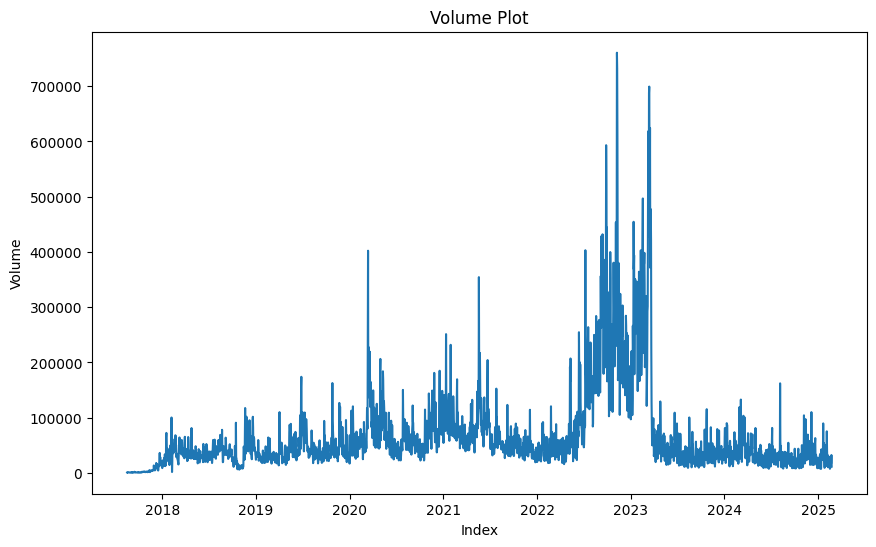

In [11]:
## Plot the 'volume' column
plt.figure(figsize=(10, 6))
plt.plot(data['Volume'], label='Volume')
plt.title('Volume Plot')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.show()

### Analyzing the Last Year of Data

This code snippet filters the data for the most recent **1 year** and visualizes the relevant features:

1. **Filter Data for the Last Year**:
   - `end_date` is set to the most recent date in the dataset using `data.index.max()`.
   - `start_date` is then calculated by subtracting 1 year from the `end_date` using `pd.DateOffset(years=1)`.
   - `filtered_data` is created to include only the data within the last year.

2. **Volume Plot for the Last Year**:
   - A line plot of the **Volume** is displayed for the last year using `filtered_data['Volume']`.
   - The plot has the title "Volume Plot (Last Year)" with proper x and y-axis labels.

3. **Close Price Trend for the Last Year**:
   - The **Close price** over the last year is plotted with `filtered_data['Close'].plot()`.
   - The plot is titled "Crypto Close Price Trend (Last Year)" with corresponding axis labels.

These visualizations help in focusing on the recent trends in volume and price, which are critical for making predictions or forecasts.


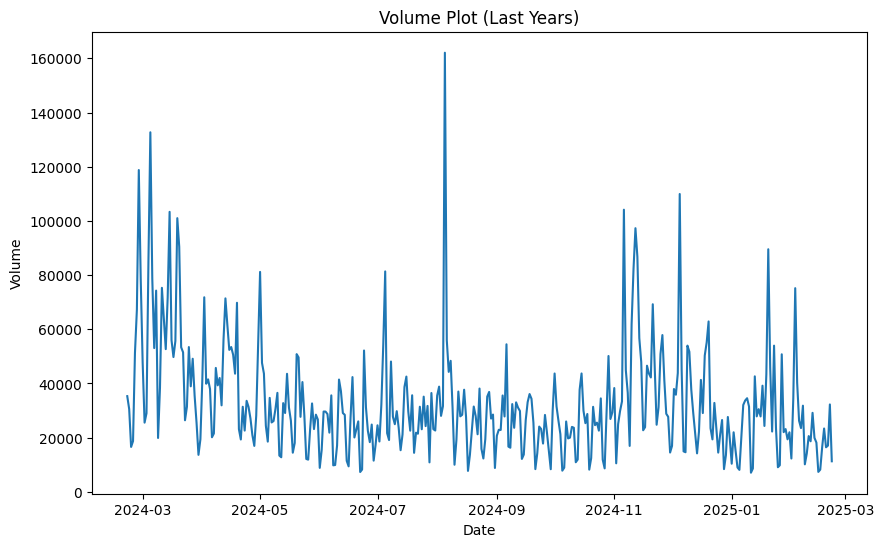

In [12]:
## Filter data for the last 2 years
end_date = data.index.max()  # Get the most recent date from the index
start_date = end_date - pd.DateOffset(years=1) 
filtered_data = data[start_date:end_date]

## Plot the 'Volume' column for the last 2 years
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Volume'], label='Volume')
plt.title('Volume Plot (Last Years)')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.show()

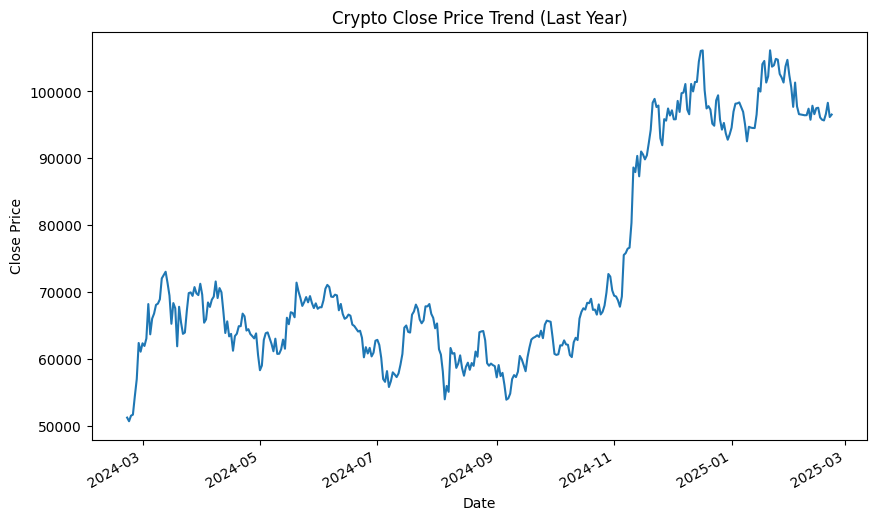

In [13]:
end_date = data.index.max()  # Get the most recent date from the index
start_date = end_date - pd.DateOffset(years=1) 
filtered_data = data[start_date:end_date]


filtered_data['Close'].plot(figsize=(10, 6))
plt.title("Crypto Close Price Trend (Last Year)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

### Box Plot for Closing Price

This code snippet creates a **box plot** for the **Close price** to visualize its distribution and identify any outliers:

1. **Box Plot Configuration**:
   - The plot is created using `plt.boxplot()` for the `Close` price.
   - `vert=False` creates a horizontal box plot.
   - Custom styling is applied to the plot:
     - The box is filled with a light blue color (`facecolor='lightblue'`), and the box border is blue (`color='blue'`).
     - Whiskers, caps, and outliers are also styled with blue and red colors for easy distinction.
     - Outliers are marked with red circles (`markerfacecolor='red'`, `marker='o'`).

2. **Plot Title and Label**:
   - The plot is titled "Box Plot for Closing Price" and the x-axis is labeled as "Closing Price."

This box plot helps in visualizing the spread, median, and outliers of the Closing Price.


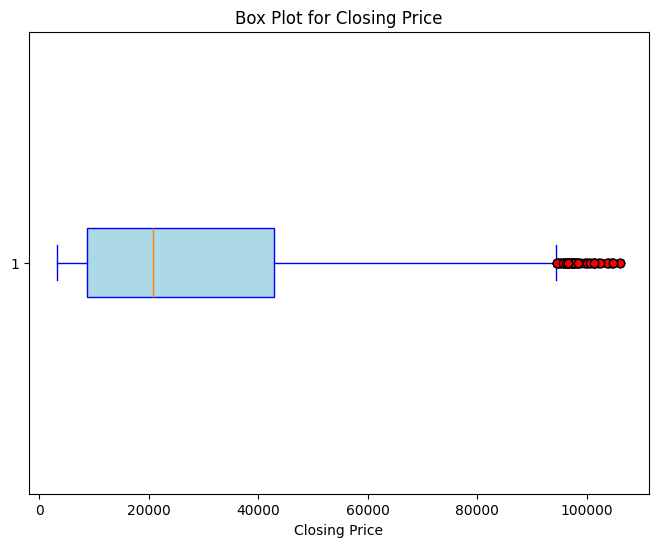

In [14]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Close'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
plt.title('Box Plot for Closing Price')
plt.xlabel('Closing Price')
plt.show()

### Calculating Rolling Averages and Shifting Features

This code snippet calculates rolling averages and a lag feature for the `Close` price and `Volume`, and visualizes them in plots:

1. **7-Day Rolling Average for Close Price**:
   - A 7-day rolling average is computed for the `Close` price using `data['Close'].rolling(window=7).mean()` and stored in the new column `Close_7d_avg`.

2. **1-Shift Lag Feature for Close Price**:
   - A lag feature is created by shifting the `Close` price by 1 time step using `data['Close'].shift(1)` and stored in `Close_lag_1`.

3. **30-Day Rolling Average for Volume**:
   - A 30-day rolling average is computed for the `Volume` using `data['Volume'].rolling(window=30).mean()` and stored in the new column `30_day_rolling_vol`.


In [15]:
# Creating the 7-day and 30-day rolling averages for 'Close'
data['Close_7d_avg'] = data['Close'].rolling(window=7).mean()  # 7-day rolling window

# Creating a 1-shift lag feature for 'Close'
data['Close_lag_1'] = data['Close'].shift(1)

# Creating the 30-day rolling average for 'Volume'
data['30_day_rolling_vol'] = data['Volume'].rolling(window=30).mean()

### Plots:

1. **Close Price and 7-Day Rolling Average**:
   - A plot is created with the `Close` price (in blue) and the 7-day rolling average (in red), allowing comparison between the actual closing prices and their 7-day trends.

2. **Volume and 30-Day Rolling Volume**:
   - Another plot is created to visualize the `Volume` (in blue) and the 30-day rolling average of volume (in red), helping to observe the long-term volume trends.

These calculations and plots provide insights into both short-term (7-day) and long-term (30-day) trends in the cryptocurrency data.

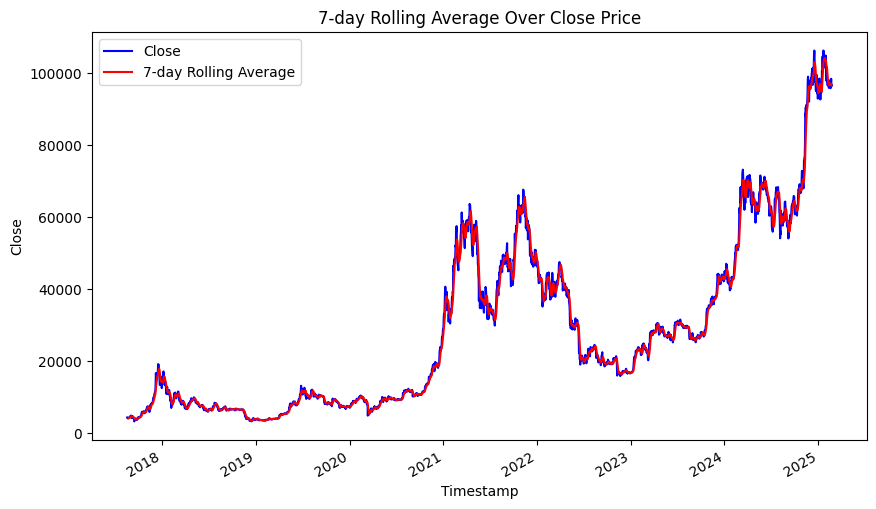

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))

data['Close'].plot(ax=ax1, color='b', label='Close', legend=True)
data[ 'Close_7d_avg'].plot(ax=ax1, color='r', label='7-day Rolling Average', legend=True)
ax1.set_ylabel("Close")
ax1.set_title("7-day Rolling Average Over Close Price")
ax1.legend(loc="upper left")

### Analyzing Data from the Last 2 Years with Rolling Averages

This code snippet filters the data for the **last 2 years**, calculates rolling averages, and visualizes the results:

1.  **Plot Close Price and 7-Day Rolling Average**:
   - A plot is created for the **Close price** (in blue) and its **7-day rolling average** (in red) for the last 2 years. The plot helps in comparing the actual prices with their short-term trends.
   - The plot includes a title, axis labels, and a legend to distinguish between the two lines.

2. **Plot Volume and 30-Day Rolling Volume**:
   - Another plot visualizes the **Volume** (in blue) and the **30-day rolling volume** (in red). This helps in analyzing the trading volume and its longer-term trends.
   - The plot includes the title, axis labels, and a legend for clarity.

These visualizations provide insights into short-term (7-day) and long-term (30-day) trends in price and volume over the last 2 years.


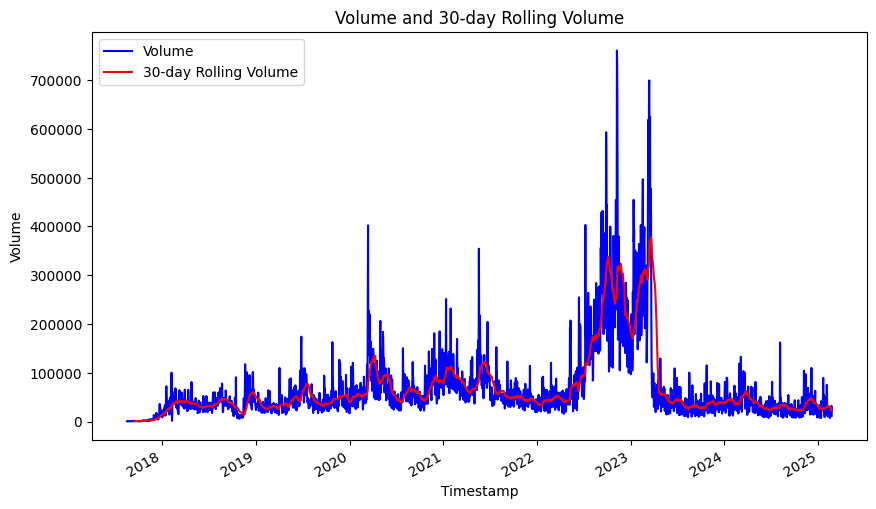

In [17]:
# Plot the 'Volume' and '30-day rolling volume' on separate axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the 'Volume'
data['Volume'].plot(ax=ax1, color='b', label='Volume', legend=True)
data['30_day_rolling_vol'].plot(ax=ax1, color='r', label='30-day Rolling Volume', legend=True)
ax1.set_ylabel("Volume")
ax1.set_title("Volume and 30-day Rolling Volume")
ax1.legend(loc="upper left")

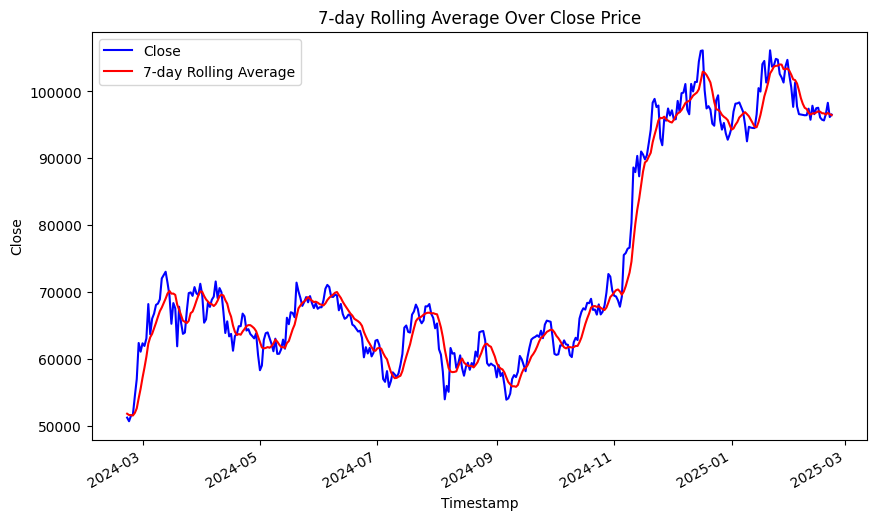

In [18]:
## Filter data for the last 2 years
end_date = data.index.max()  # Get the most recent date from the index
start_date = end_date - pd.DateOffset(years=1) 
filtered_data = data[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(10, 6))

filtered_data['Close'].plot(ax=ax1, color='b', label='Close', legend=True)
filtered_data[ 'Close_7d_avg'].plot(ax=ax1, color='r', label='7-day Rolling Average', legend=True)
ax1.set_ylabel("Close")
ax1.set_title("7-day Rolling Average Over Close Price")
ax1.legend(loc="upper left")

### Extracting Time Components for Feature Engineering

This code snippet extracts various time-based features from the **datetime index** of the dataset, which can be useful for capturing seasonality or day-of-week effects in forecasting models:

1. **Extract Year**:
   - The `year` component is extracted using `data.index.year` and stored in a new column named `year`.

2. **Extract Month**:
   - The `month` component is extracted using `data.index.month` and stored in a new column named `month`.

3. **Extract Day**:
   - The `day` component is extracted using `data.index.day` and stored in a new column named `day`.

4. **Extract Day of the Week**:
   - The `day_of_week` component is extracted using `data.index.dayofweek` and stored in a new column named `day_of_week`, where Monday is 0 and Sunday is 6.

These extracted time components can be useful for feature engineering, especially when trying to capture patterns related to different times of the year, month, or week.

Finally, the first few rows of the updated dataset are displayed using `data.head()`.


In [19]:
# Extract various time components as separate columns for potential feature engineering.
# This is often useful for capturing seasonality or day-of-week effects in models.
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek

# Display the first few rows
data.head()


,Open,High,Low,Close,Volume,Close_7d_avg,Close_lag_1,30_day_rolling_vol,year,month,day,day_of_week
Timestamp,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,2017,8,17,3
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,4285.08,NaN,2017,8,18,4
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,4108.37,NaN,2017,8,19,5
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,4139.98,NaN,2017,8,20,6
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,4086.29,NaN,2017,8,21,0


### Technical Indicators for Feature Engineering

This code snippet calculates several technical indicators often used in time series analysis for financial data:

1. **Simple Moving Average (SMA)**:
   - **5-Day SMA**: A 5-day **Simple Moving Average (SMA)** is computed for the `Close` price using `data['Close'].rolling(window=5).mean()`, and stored in a new column `SMA_5`.
   - **10-Day SMA**: A 10-day **SMA** is computed for the `Close` price using `data['Close'].rolling(window=10).mean()`, and stored in a new column `SMA_10`.

2. **Exponential Moving Average (EMA)**:
   - A **5-Day Exponential Moving Average (EMA)** is calculated for the `Close` price using `data['Close'].ewm(span=5, adjust=False).mean()`, and stored in a new column `EMA_5`. The EMA gives more weight to recent prices, making it more responsive to price changes.

3. **Relative Strength Index (RSI)**:
   - The **Relative Strength Index (RSI)** is calculated to measure the speed and change of price movements.
     - First, the difference between consecutive `Close` prices is computed using `data['Close'].diff()`.
     - Positive differences (gains) are separated from negative differences (losses).
     - The average gain and average loss are calculated over a rolling 14-day window.
     - The **RSI** is then computed using the formula:  
       \[
       RSI = 100 - \left( \frac{100}{1 + RS} \right)
       \]
       where **RS** is the ratio of average gain to average loss. The resulting RSI is stored in the column `RSI_14`.

These technical indicators provide useful features for forecasting and understanding market conditions, particularly in financial models.


In [20]:
## SMA
data['SMA_5'] = data['Close'].rolling(window=5).mean()  # 5-day SMA
data['SMA_10'] = data['Close'].rolling(window=10).mean()  # 10-day SMA

## EMA
data['EMA_5'] = data['Close'].ewm(span=5, adjust=False).mean()

## RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI_14'] = 100 - (100 / (1 + rs))

### Visualizing Technical Indicators

This code snippet filters the data for the last **2 years** and generates visualizations for various technical indicators: **Closing Price**, **SMA (Simple Moving Average)**, **EMA (Exponential Moving Average)**, and **RSI (Relative Strength Index)**.

1. **Filter Data for the Last 2 Years**:
   - `end_date` is set to the most recent date in the dataset using `data.index.max()`.
   - `start_date` is calculated by subtracting 1 year from `end_date` using `pd.DateOffset(years=1)`.
   - The filtered data for the last 2 years is stored in `data_filtered`.

2. **Plotting Closing Price, SMA, and EMA**:
   - A plot is created showing the **Closing Price** (in blue), **5-day SMA** (in green), **10-day SMA** (in orange), and **5-day EMA** (in red).
   - Labels and a title are added to the plot to clearly represent each line.
   - A legend is included to differentiate between the various price trends.
   
3. **Plotting RSI (Relative Strength Index)**:
   - A separate plot is created for the **RSI 14** (in purple) for the last 2 years.
   - Horizontal lines are added at the **30** and **70** levels, representing the oversold and overbought conditions respectively (green and red dashed lines).
   - Labels and a title are added for clarity, and a legend is included to label the overbought and oversold levels.

These visualizations help in understanding the trends of the **Closing Price**, its moving averages (SMA & EMA), and the **RSI**, which is useful for identifying potential buy/sell signals based on market conditions.


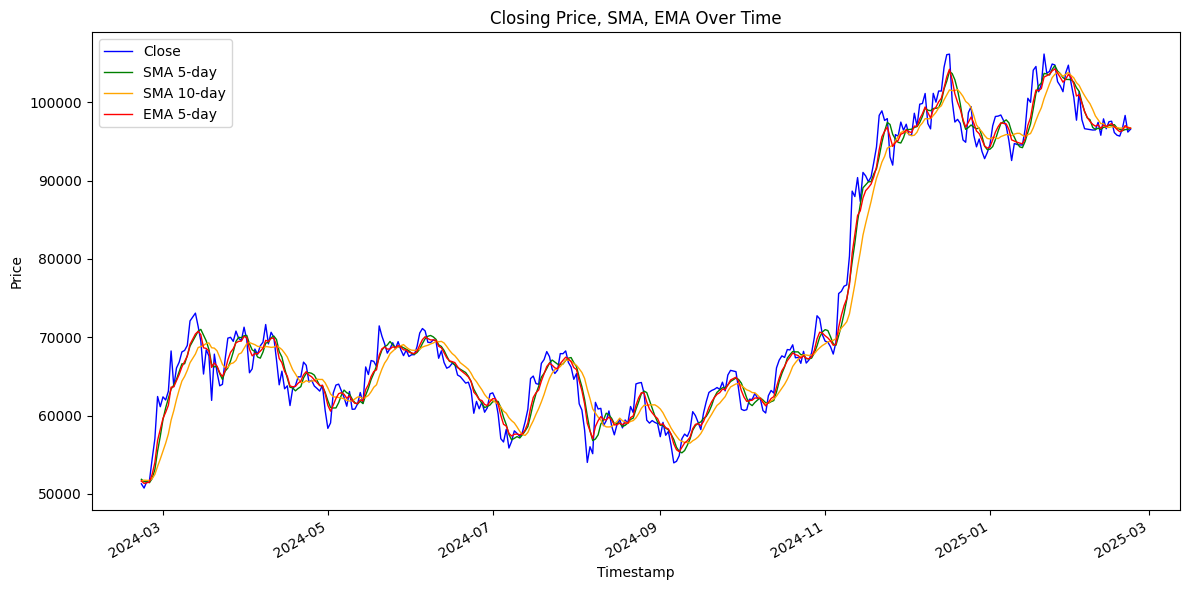

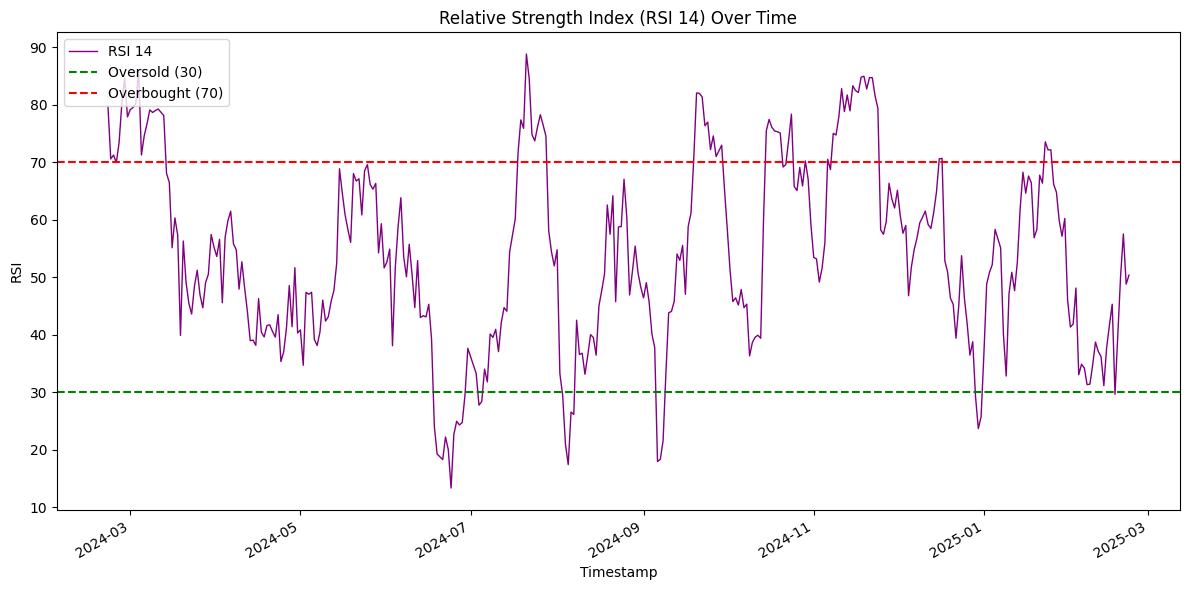

In [21]:
## Filter data for the last 2 years
end_date = data.index.max()  # Get the most recent date from the index
start_date = end_date - pd.DateOffset(years=1) 
data_filtered = data[start_date:end_date]


# Create a plot for Closing Price, SMA, and EMA
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Closing Price
data_filtered['Close'].plot(ax=ax1, color='blue', label='Close', linewidth=1)

# Plot the 5-day and 10-day SMA
data_filtered['SMA_5'].plot(ax=ax1, color='green', label='SMA 5-day', linewidth=1)
data_filtered['SMA_10'].plot(ax=ax1, color='orange', label='SMA 10-day', linewidth=1)

# Plot the 5-day EMA
data_filtered['EMA_5'].plot(ax=ax1, color='red', label='EMA 5-day', linewidth=1)

# Set labels and title
ax1.set_ylabel("Price")
ax1.set_title("Closing Price, SMA, EMA Over Time")
ax1.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# Create a separate plot for RSI (Relative Strength Index)
fig, ax2 = plt.subplots(figsize=(12, 6))

# Plot RSI
data_filtered['RSI_14'].plot(ax=ax2, color='purple', label='RSI 14', linewidth=1)

# Add horizontal lines at 30 and 70 to indicate oversold and overbought levels
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')

# Set labels and title for RSI plot
ax2.set_ylabel("RSI")
ax2.set_title("Relative Strength Index (RSI 14) Over Time")
ax2.legend(loc='upper left')

# Show the RSI plot
plt.tight_layout()
plt.show()


### Handling Missing Values in Technical Indicators

This code handles **NaN values** in several technical indicator columns by filling them using a combination of manual filling and rolling averages:

1. **Check for NaN Values**:
   - `data[["Close_7d_avg", "Close_lag_1", "30_day_rolling_vol", "SMA_5", "SMA_10", "RSI_14"]].isna().sum()` checks the presence of NaN values in the relevant columns.

2. **Fill NaN Values in the First 30 Rows**:
   - For the first 30 rows, the **mean** of the first 30 valid entries is calculated and used to fill NaN values in columns like `SMA_5`, `SMA_10`, `RSI_14`, `Close_7d_avg`, `Close_lag_1`, and `30_day_rolling_vol`.

3. **Fill Remaining NaN Values Using Rolling Mean**:
   - After the first 30 rows, **NaN values** are filled using a **30-day rolling mean** for all relevant columns.

4. **Verify Filling Process**:
   - After filling, the presence of remaining NaN values is checked, and the first few rows are displayed to ensure the missing values have been handled correctly.

This ensures that the technical indicator columns are properly filled and ready for analysis or modeling.


In [22]:
# Check if NaN values exist in the relevant columns
print(data[["Close_7d_avg", "Close_lag_1", "30_day_rolling_vol", "SMA_5", "SMA_10", "RSI_14"]].isna().sum())

# Calculate the mean of the first 30 rows (if enough data exists) for the new columns
mean_30_sma_5 = data["SMA_5"].iloc[:30].mean()
mean_30_sma_10 = data["SMA_10"].iloc[:30].mean()
mean_30_rsi_14 = data["RSI_14"].iloc[:30].mean()

# Manually fill NaN values in the first 30 rows for the new columns
data["SMA_5"].iloc[:30] = data["SMA_5"].iloc[:30].fillna(mean_30_sma_5)
data["SMA_10"].iloc[:30] = data["SMA_10"].iloc[:30].fillna(mean_30_sma_10)
data["RSI_14"].iloc[:30] = data["RSI_14"].iloc[:30].fillna(mean_30_rsi_14)

# Manually fill NaN values in the first 30 rows for the original columns
mean_30_close_7d_avg = data["Close_7d_avg"].iloc[:30].mean()
mean_30_close_lag_1 = data["Close_lag_1"].iloc[:30].mean()
mean_30_rolling_vol = data["30_day_rolling_vol"].iloc[:30].mean()

data["Close_7d_avg"].iloc[:30] = data["Close_7d_avg"].iloc[:30].fillna(mean_30_close_7d_avg)
data["Close_lag_1"].iloc[:30] = data["Close_lag_1"].iloc[:30].fillna(mean_30_close_lag_1)
data["30_day_rolling_vol"].iloc[:30] = data["30_day_rolling_vol"].iloc[:30].fillna(mean_30_rolling_vol)

# After the first 30 rows, continue filling NaN values using rolling mean for all relevant columns
columns_to_fill = ["Close_7d_avg", "Close_lag_1", "30_day_rolling_vol", "SMA_5", "SMA_10", "RSI_14"]

for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].rolling(window=30, min_periods=1).mean())

# Verify if NaN values are filled
print(data[["Close_7d_avg", "Close_lag_1", "30_day_rolling_vol", "SMA_5", "SMA_10", "RSI_14"]].isna().sum())

# Display the first few rows to verify
data.head()

Close_7d_avg           6
Close_lag_1            1
30_day_rolling_vol    29
SMA_5                  4
SMA_10                 9
RSI_14                13
dtype: int64
Close_7d_avg          0
Close_lag_1           0
30_day_rolling_vol    0
SMA_5                 0
SMA_10                0
RSI_14                0
dtype: int64


C:\Users\adnan\AppData\Local\Temp\ipykernel_3308\1803353252.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["SMA_5"].iloc[:30] = data["SMA_5"].iloc[:30].fillna(mean_30_sma_5)
C:\Users\adnan\AppData\Local\Temp\ipykernel_3308\1803353

,Open,High,Low,Close,Volume,Close_7d_avg,Close_lag_1,30_day_rolling_vol,year,month,day,day_of_week,SMA_5,SMA_10,EMA_5,RSI_14
Timestamp,,,,,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,4334.612083,4277.932414,823.547638,2017,8,17,3,4311.910462,4362.71719,4285.080000,52.837308
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,4334.612083,4285.080000,823.547638,2017,8,18,4,4311.910462,4362.71719,4226.176667,52.837308
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,4334.612083,4108.370000,823.547638,2017,8,19,5,4311.910462,4362.71719,4197.444444,52.837308
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,4334.612083,4139.980000,823.547638,2017,8,20,6,4311.910462,4362.71719,4160.392963,52.837308
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,4334.612083,4086.290000,823.547638,2017,8,21,0,4127.144000,4362.71719,4112.261975,52.837308


### Seasonality Plots for 'Close' Price

This code generates **seasonality plots** for the **Closing Price** to visualize monthly and quarterly trends:

1. **Monthly Seasonality Plot**:
   - The data is resampled to the **monthly-end ("ME")** frequency using `data['Close'].resample('ME').mean()`, which calculates the mean closing price at the end of each month.
   - The plot is displayed using `month_plot()`, which visualizes the seasonal patterns for each month of the year.

2. **Quarterly Seasonality Plot**:
   - The data is resampled to **quarter-end ("QE")** frequency using `data['Close'].resample('QE').mean()`, showing the mean closing price at the end of each quarter.
   - The plot is displayed using `quarter_plot()`, visualizing seasonal trends for each quarter.

These plots help in understanding how the **Closing Price** behaves over different periods (monthly and quarterly), highlighting any seasonal trends.


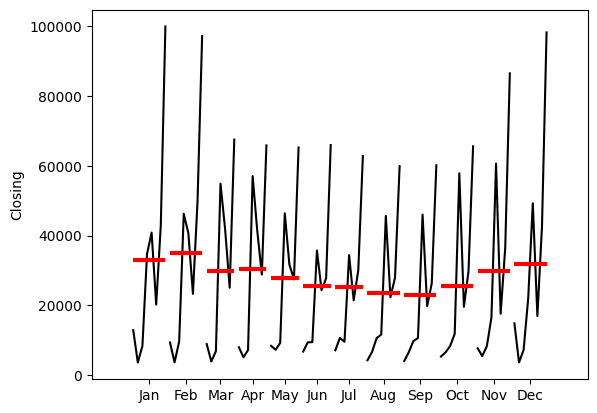

In [23]:
# Monthly seasonality plot for the 'Close' price, resampled to monthly-end ("ME") mean.
# month_plot displays each month of the year separately, helping visualize seasonal patterns.
month_plot(data['Close'].resample('ME').mean(), ylabel="Closing")
plt.show()

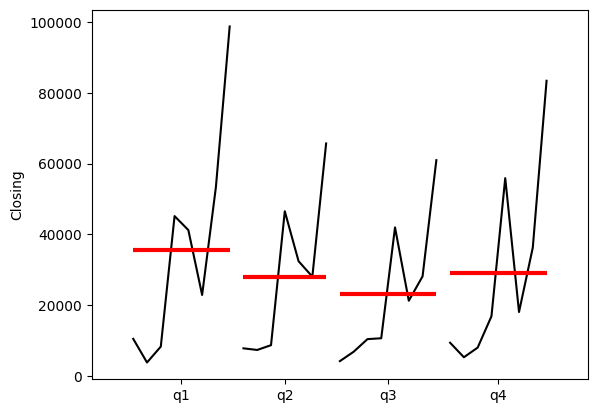

In [24]:
# Quarterly seasonality plot using quarter_plot.
# The data is resampled at the quarter-end ("QE") and then the mean is plotted by quarter.
quarter_plot(data['Close'].resample('QE').mean(), ylabel="Closing")
plt.show()

### Seasonal Decomposition of 'Close' Price

This code uses **seasonal decomposition** to break down the 'Close' price into its components (trend, seasonal, and residual):

1. **Seasonal Decomposition**:
   - The `seasonal_decompose` function is used to decompose the 'Close' price series.
   - The decomposition is performed using an **additive model** with a **weekly period (7 days)**, specifying that the seasonality is expected to repeat every 7 days.
   - The `period=7` argument indicates that the seasonal pattern should repeat weekly.

2. **Plotting the Decomposition**:
   - The decomposition results are plotted with `fig = decomposition.plot()`, which displays the trend, seasonal, and residual components.
   - The plot size is adjusted to be large enough for better visualization using `fig.set_size_inches(18, 10)`.

This decomposition helps to isolate and analyze the underlying trends, seasonal patterns, and noise (residuals) in the 'Close' price over time.


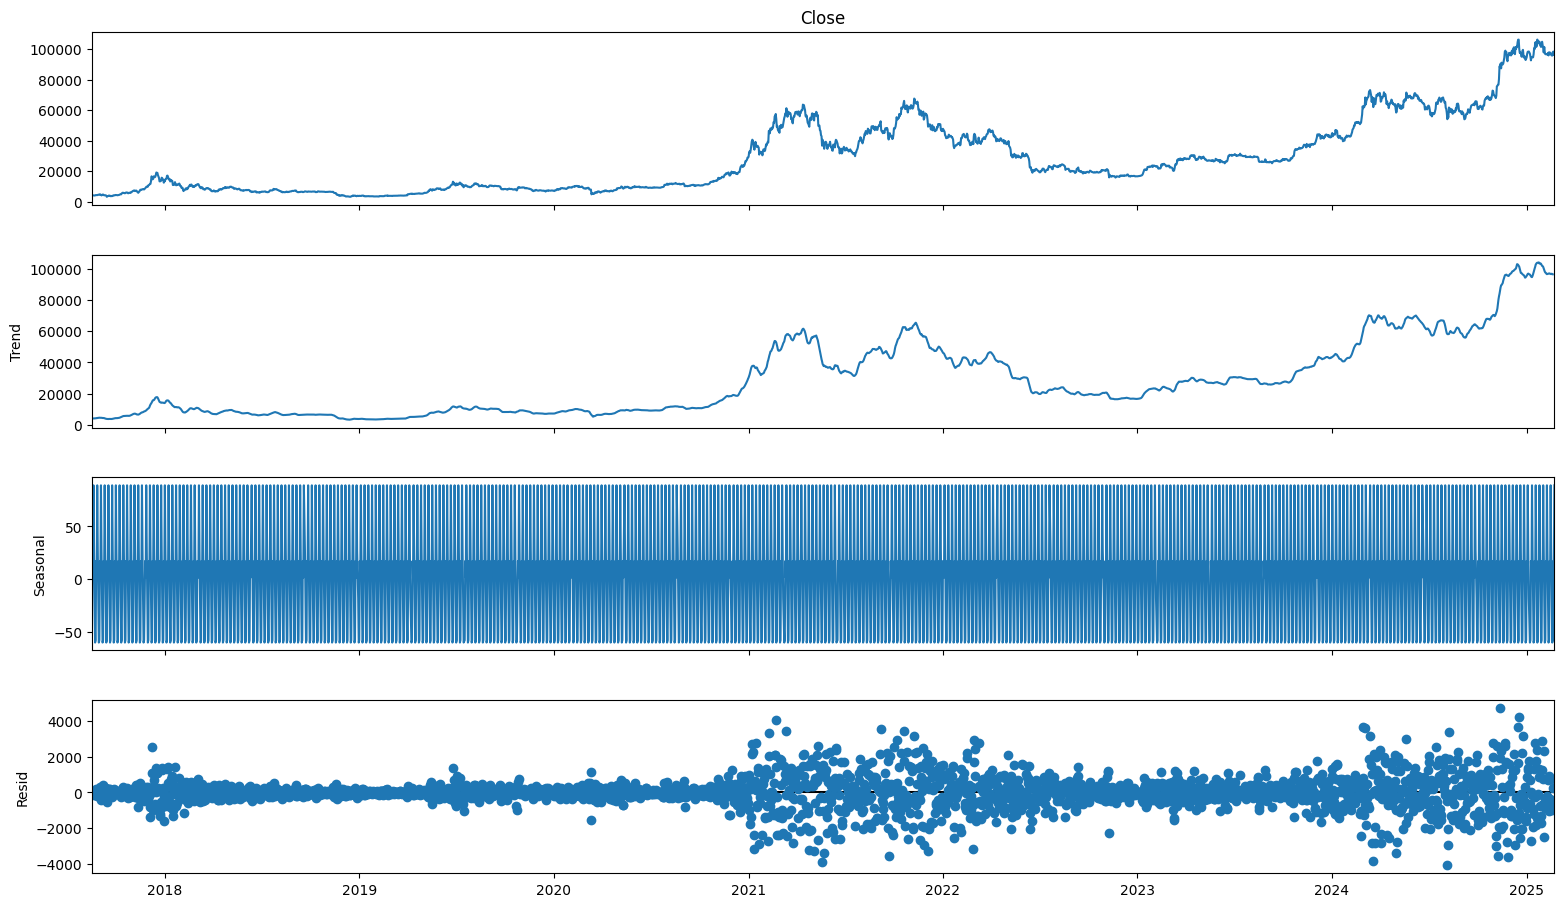

In [25]:
# 'seasonal_decompose' can only handle one seasonal period at a time.
# Decompose the 'Adj Close' series with a weekly (period=7) additive model.
decomposition = seasonal_decompose(data['Close'],
                                   model='additive',
                                   period=7)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()



##### LAST YEAR DATA

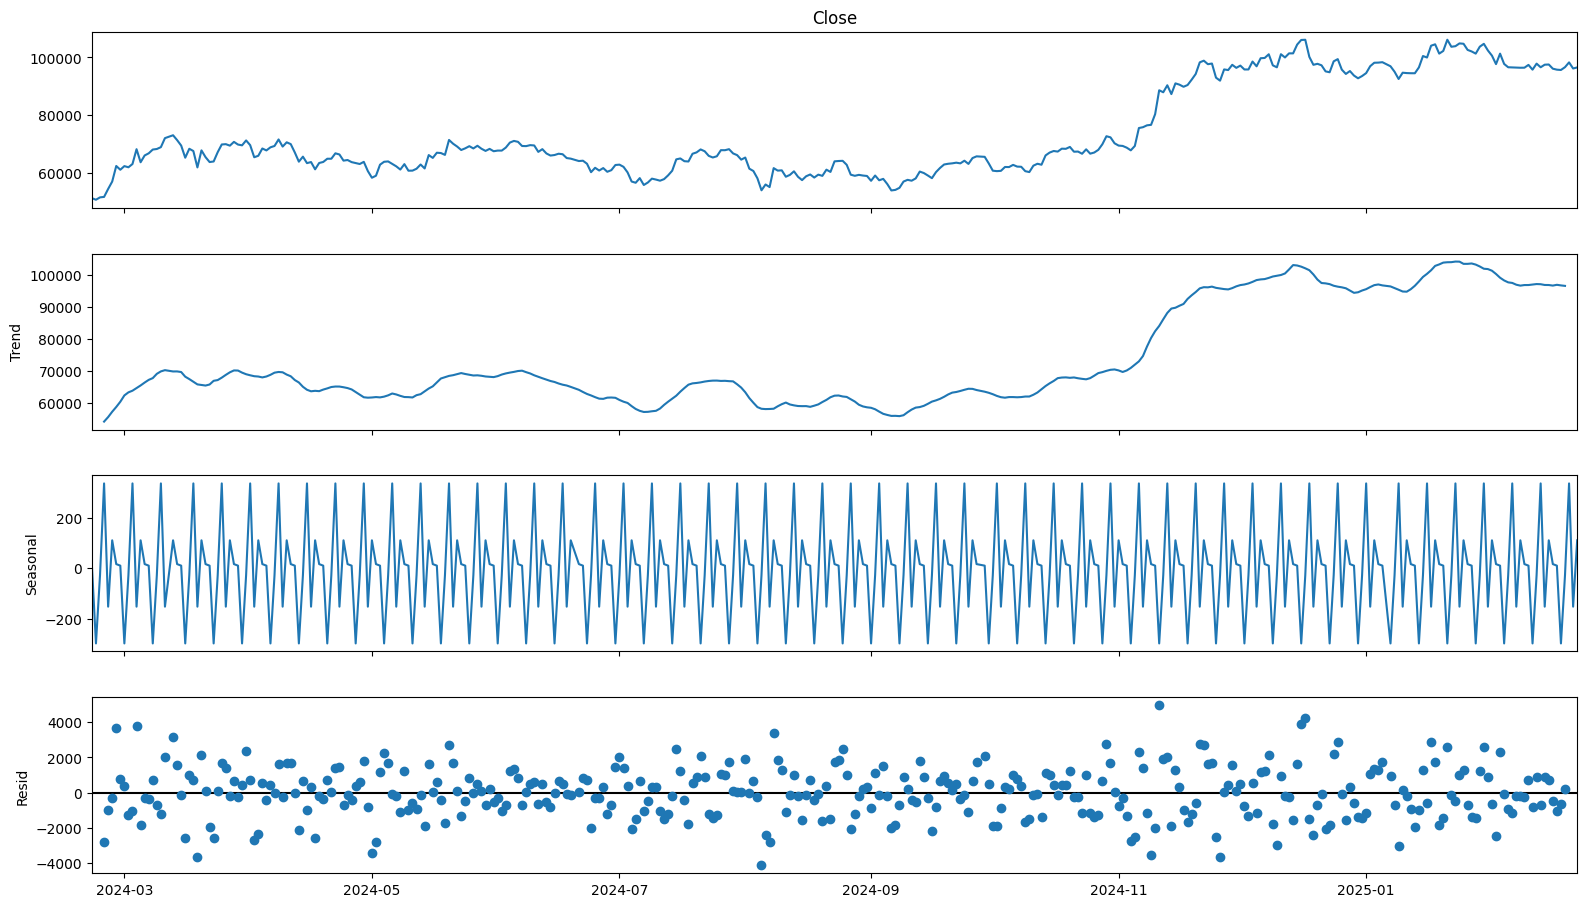

In [26]:
decomposition = seasonal_decompose(data_filtered['Close'],
                                   model='additive',
                                   period=7)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()


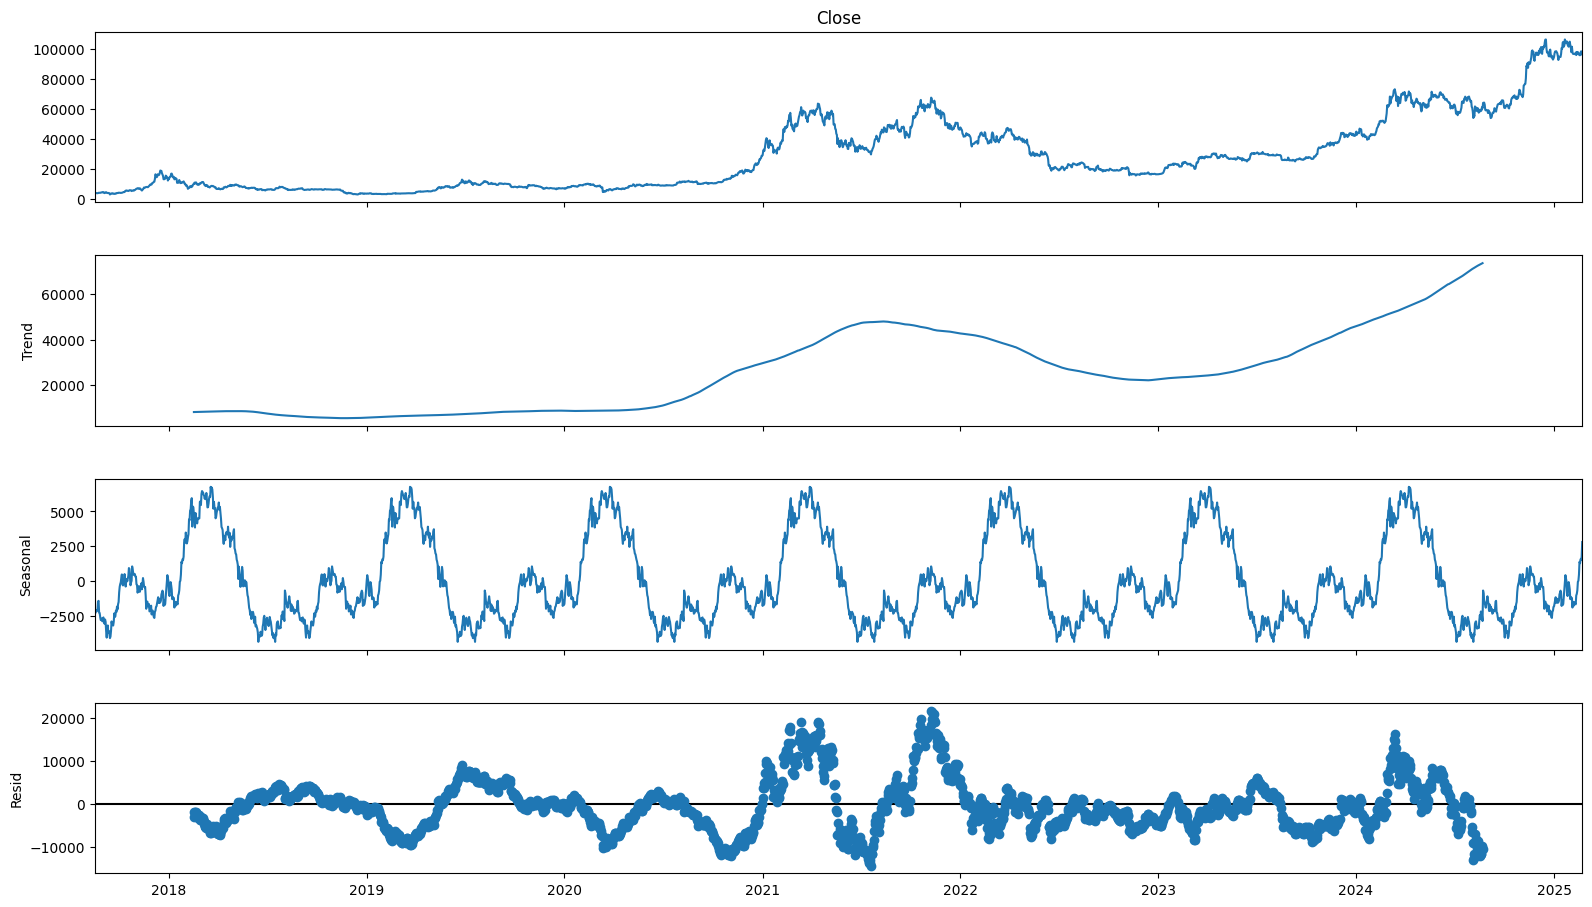

In [27]:
decomposition = seasonal_decompose(data['Close'],
                                   model='additive',
                                   period=365)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()


### Seasonal Decomposition of 'Close' Price

The `seasonal_decompose` function is used to decompose the **'Close'** price series with a **weekly (period=7)** additive model, showing trend, seasonal, and residual components.

### Correlation Analysis

1. **Pearson Correlation**: 
   - The **Pearson correlation** between the **30-day rolling volume** and **Closing price** is calculated, providing insight into their raw association.

2. **Correlation Matrix**:
   - A correlation matrix is displayed to visualize relationships between **'Close'** and **'30_day_rolling_vol'**.


In [28]:
# Perform (Pearson) correlation between the 30-day rolling volume and the Closing price.
# Pearson correlation for time series can be misleading due to non-stationarity or trends,
# but it's a quick metric to see raw association.
print(data["30_day_rolling_vol"].corr(data["Close"]))

# Display the correlation matrix. Diagonals are always 1.
data[["Close", "30_day_rolling_vol"]].corr()

-0.08956591722301711


,Close,30_day_rolling_vol
Close,1.000000,-0.089566
30_day_rolling_vol,-0.089566,1.000000


### Autocorrelation (ACF) and Partial Autocorrelation (PACF)

1. **Autocorrelation (ACF)**:
   - The **Autocorrelation Function (ACF)** measures how current values of a series are correlated with its past values (lags).
   - The plot shows ACF for the **'Close'** price with **100 lags**.

2. **Partial Autocorrelation (PACF)**:
   - The **Partial Autocorrelation Function (PACF)** explains the correlation between a time series and its own lags, after removing the influence of intermediate lags.
   - The PACF plot helps identify which lags still have an influence on the current value after accounting for others.

Both plots are helpful in identifying **lag structure** and in **ARIMA** model selection.


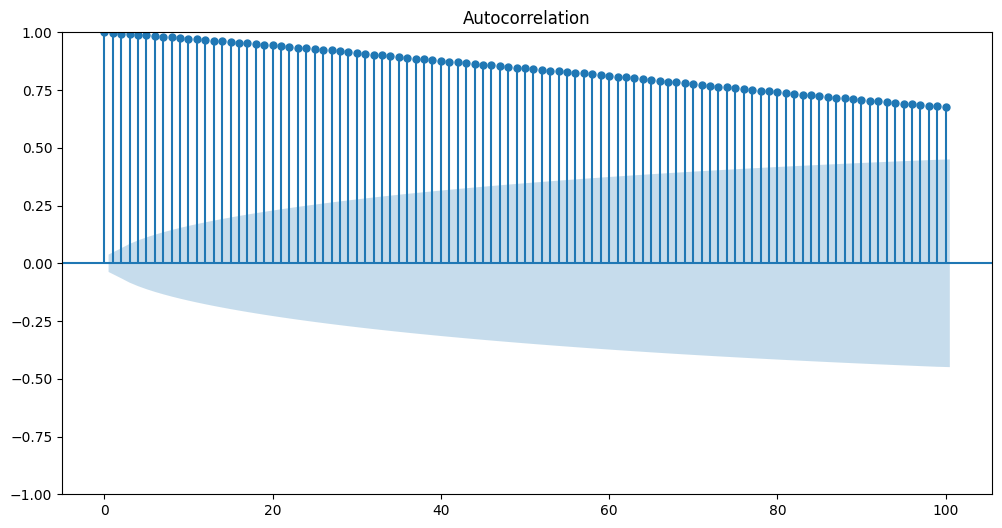

In [29]:
# Autocorrelation (ACF) measures how current values of a series relate to its own past values.
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Close'], lags=100, ax=ax)
plt.show()

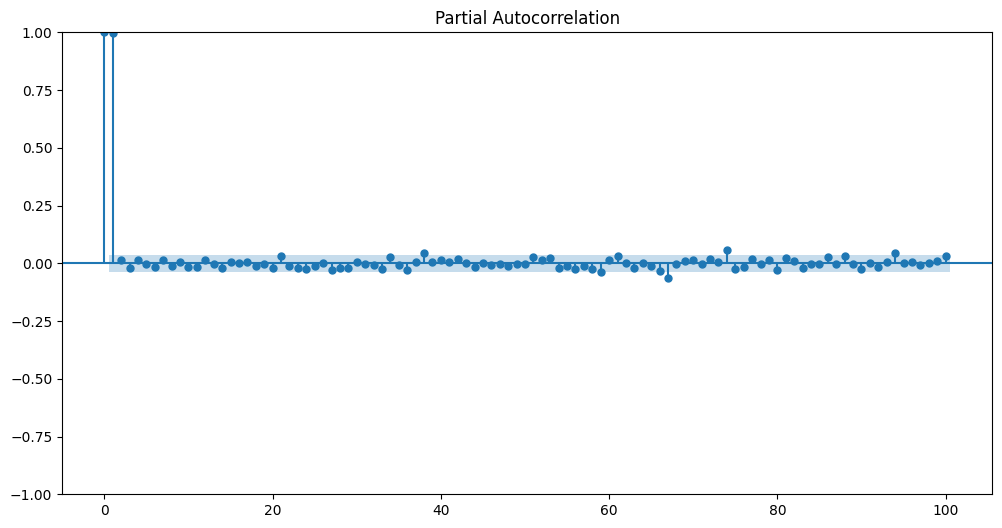

In [30]:
# PACF explains the correlation of a time series with its own lags after removing the effects of
# intermediate lags. It's useful for identifying which lag(s) still have influence on the current value
# once others are accounted for.
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(data['Close'], lags=100, ax=ax)
plt.show()

In [31]:
data.head()

,Open,High,Low,Close,Volume,Close_7d_avg,Close_lag_1,30_day_rolling_vol,year,month,day,day_of_week,SMA_5,SMA_10,EMA_5,RSI_14
Timestamp,,,,,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,4334.612083,4277.932414,823.547638,2017,8,17,3,4311.910462,4362.71719,4285.080000,52.837308
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,4334.612083,4285.080000,823.547638,2017,8,18,4,4311.910462,4362.71719,4226.176667,52.837308
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,4334.612083,4108.370000,823.547638,2017,8,19,5,4311.910462,4362.71719,4197.444444,52.837308
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,4334.612083,4139.980000,823.547638,2017,8,20,6,4311.910462,4362.71719,4160.392963,52.837308
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,4334.612083,4086.290000,823.547638,2017,8,21,0,4127.144000,4362.71719,4112.261975,52.837308


In [32]:
# To read data and specify column names
df = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

C:\Users\adnan\AppData\Local\Temp\ipykernel_3308\2555485820.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(df['Timestamp'].min(), df['Timestamp'].max(), freq='Y')


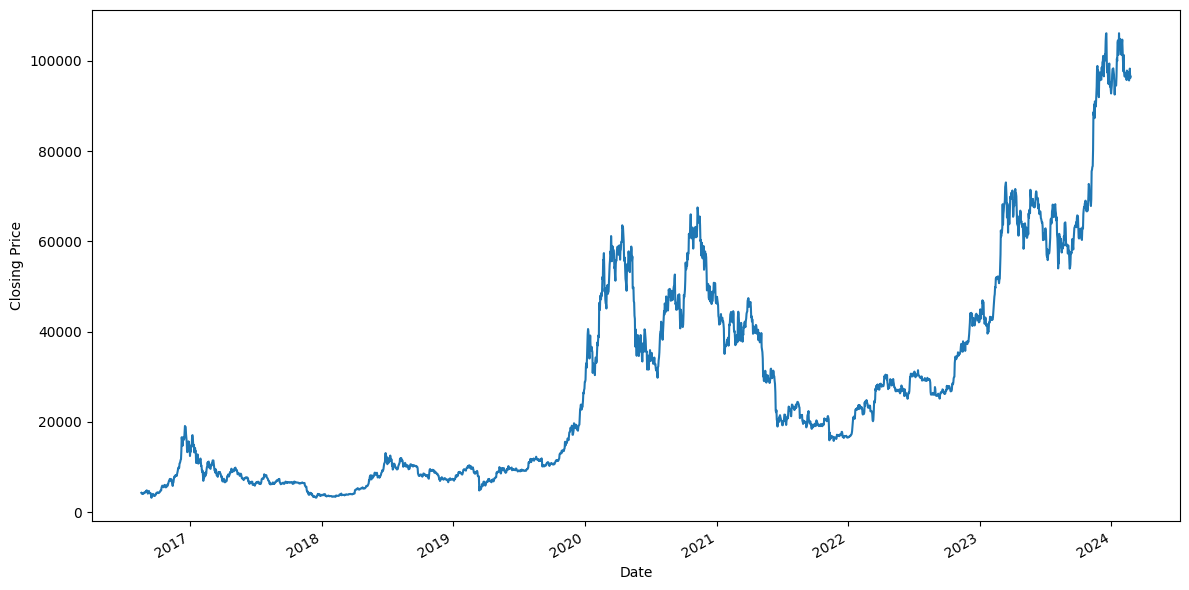

In [33]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Timestamp'], df['Close'])

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Set x-ticks at yearly intervals
years = pd.date_range(df['Timestamp'].min(), df['Timestamp'].max(), freq='Y')
ax.set_xticks(years)

# Format x-tick labels
ax.set_xticklabels([year.year for year in years], rotation=45)

# Automatically format the x-axis date labels
fig.autofmt_xdate()

# Adjust layout
plt.tight_layout()
plt.show()

In [35]:
data.to_csv('btc.csv')  # Save the DataFrame to a CSV file